# 1. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import os
import pandas as pd
# 모든 열 출력
pd.set_option('display.max_columns', None) 
import numpy as np

In [ ]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
# Machine Learning Library Import
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# path = '../data/70사7219_현대최신형_원버스_202008202102/'
# file_list = os.listdir(path)
# file_list_py = [file for file in file_list if file.endswith('.csv')]

# df = pd.DataFrame()

In [ ]:
# for i in file_list_py:
#     data = pd.read_csv(path + i, encoding='cp949')
#     df = pd.concat([df,data])
    
# df = df.reset_index(drop = True)

In [ ]:
# df.shape

In [ ]:
# df.head()

# 2. Data Load

In [ ]:
# 일단 하나의 csv 파일을 가져와 분석(공항버스의 8163버스의 2020-10-03의 하루 데이터)
data = '/content/drive/MyDrive/Codestates Aibootcamp/tenergy/data/공항버스/70사8163_현대신형_중형_공항버스_6632/2020_10_03_70사8163_v001N.csv'
df = pd.read_csv(data, encoding='cp949')

print(df.shape)
df.head()

(50298, 44)


,DrvState,LogType,BusType,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
0,D,S,중형,1,0,0,1,1,1,0,0,1,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
1,D,S,중형,1,0,0,1,1,1,0,0,2,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
2,D,S,중형,1,0,0,1,1,1,0,0,3,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
3,D,S,중형,1,0,0,1,1,1,0,0,4,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
4,D,S,중형,1,0,0,1,1,1,0,0,5,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0


### 2.1 Data Columns Name

In [ ]:
# 데이터의 컬럼이름 확인
df.columns

Index(['DrvState', 'LogType', 'BusType', 'BusState', 'CanState', 'AuxStatus',
       'Year', 'Month', 'Day', 'Hours', 'Minute', 'Sec', 'CoolTemp',
       'FanControl', 'RPM', 'Speed', 'TachoSpeed', 'CanSpeed', 'GpsSpeed',
       'APS', 'Brake', 'ACC', 'Torque', 'FuelRate', 'EcoGear', 'DriveGear',
       'AccGrade', 'Acc2Grade', 'DecGrade', 'CoastingGrade', 'AvgRPMGrade',
       'SpeedGrade', 'SIGrade', 'PreSIGrade', 'ShortAccGrade', 'EcoGrade',
       'DrvNo', 'GpsState', 'Latitude', 'Longitude', 'ItemIndex1',
       'ItemIndex2', 'ItemIndex3', 'ItemIndex4'],
      dtype='object')

### 2.2 Data Unique Value

In [ ]:
# 각 특성의 unique 값을 확인
for i in df.columns:
    print(i, '\n', df[i].unique())

DrvState 
 ['D' 'E' 'U' 'F' 'B' 'S']
LogType 
 ['S' 'F']
BusType 
 ['중형']
BusState 
 [1 0 4 3 2]
CanState 
 [0 1]
AuxStatus 
 [0]
Year 
 [   1 2020]
Month 
 [ 1 10]
Day 
 [1 3 4]
Hours 
 [ 0  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Minute 
 [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20]
Sec 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59  0 33 34 35 36 37 38 39 40 41 42]
CoolTemp 
 [ 0 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 87 88 89 90 37 38 39]
FanControl 
 [4]
RPM 
 [   0  127  202 ... 2256 2491 2115]
Speed 
 [ 0.     0.685  2.742  4.113  2.056  1.371  5.484  6.169  4.798  8.226
 10.282  8.911 13.024 15.081 16.452 18.508 17.823 13.

### 2.3 Data Null value

In [ ]:
# 결측치 확인
df.isnull().sum()

DrvState         0
LogType          0
BusType          0
BusState         0
CanState         0
AuxStatus        0
Year             0
Month            0
Day              0
Hours            0
Minute           0
Sec              0
CoolTemp         0
FanControl       0
RPM              0
Speed            0
TachoSpeed       0
CanSpeed         0
GpsSpeed         0
APS              0
Brake            0
ACC              0
Torque           0
FuelRate         0
EcoGear          0
DriveGear        0
AccGrade         0
Acc2Grade        0
DecGrade         0
CoastingGrade    0
AvgRPMGrade      0
SpeedGrade       0
SIGrade          0
PreSIGrade       0
ShortAccGrade    0
EcoGrade         0
DrvNo            0
GpsState         0
Latitude         0
Longitude        0
ItemIndex1       0
ItemIndex2       0
ItemIndex3       0
ItemIndex4       0
dtype: int64

### 2.4 Data Type

In [ ]:
# type 확인
pd.DataFrame(df.dtypes)

,0
DrvState,object
LogType,object
BusType,object
BusState,int64
CanState,int64
AuxStatus,int64
Year,int64
Month,int64
Day,int64
Hours,int64


### 2.5 Data Correlation

In [ ]:
# 각 특성의 상관계수 확인
df_corr = df.corr()
df_corr

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
BusState,1.000000,0.220344,NaN,0.032032,0.032032,0.019600,0.006034,0.053292,0.001250,0.153632,NaN,0.092355,0.025996,0.025962,0.025682,0.030527,0.001983,-0.008314,0.001336,0.037268,0.007171,0.074015,0.075753,0.065503,0.054848,0.110755,0.153556,0.104770,-0.213265,0.124441,-0.189703,-0.232008,-0.120615,-0.124721,0.089506,0.091513,0.089286,0.015081,NaN,NaN,NaN
CanState,0.220344,1.000000,NaN,0.153932,0.153932,0.032403,0.077298,0.038969,0.004940,0.948407,NaN,0.470000,0.187229,0.187253,0.187815,0.175464,0.097944,0.128111,0.000047,0.178249,0.153029,0.223582,0.225474,-0.053897,0.064565,-0.115358,-0.023244,-0.099040,0.245005,-0.027082,0.206660,0.248003,0.200336,0.151272,0.310627,0.319098,0.320132,0.153132,NaN,NaN,NaN
AuxStatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.032032,0.153932,NaN,1.000000,1.000000,0.263116,0.061076,0.042972,0.018911,0.145990,NaN,0.072348,0.028820,0.028824,0.028911,0.027249,0.015077,0.019720,0.000007,0.027438,0.023556,0.034416,0.034708,0.099502,0.711525,0.257168,0.437716,0.148141,-0.011922,0.508248,-0.018989,-0.015087,0.319554,0.124803,0.248558,0.256238,0.256238,0.023572,NaN,NaN,NaN
Month,0.032032,0.153932,NaN,1.000000,1.000000,0.263116,0.061076,0.042972,0.018911,0.145990,NaN,0.072348,0.028820,0.028824,0.028911,0.027249,0.015077,0.019720,0.000007,0.027438,0.023556,0.034416,0.034708,0.099502,0.711525,0.257168,0.437716,0.148141,-0.011922,0.508248,-0.018989,-0.015087,0.319554,0.124803,0.248558,0.256238,0.256238,0.023572,NaN,NaN,NaN
Day,0.019600,0.032403,NaN,0.263116,0.263116,1.000000,-0.440833,-0.146297,0.003725,0.023545,NaN,0.061548,0.030203,0.030183,0.030259,0.033792,0.026144,0.006288,-0.001262,0.003948,0.015101,0.022958,0.025851,-0.058897,0.248355,0.088865,0.196323,-0.161999,0.072338,-0.024678,0.035580,0.038739,0.050670,-0.105559,0.021528,0.025396,0.024918,0.014938,NaN,NaN,NaN
Hours,0.006034,0.077298,NaN,0.061076,0.061076,-0.440833,1.000000,0.057312,0.000410,0.109700,NaN,0.180178,0.014621,0.014583,0.015315,0.013565,0.124641,0.120186,0.000525,0.006228,0.055987,-0.061382,-0.061772,-0.302593,-0.001322,-0.253977,-0.377780,-0.489267,0.118691,-0.332671,0.006408,0.084367,-0.283674,-0.498360,0.067859,0.067771,0.068300,0.054714,NaN,NaN,NaN
Minute,0.053292,0.038969,NaN,0.042972,0.042972,-0.146297,0.057312,1.000000,0.002228,0.034820,NaN,0.022268,0.007715,0.007808,0.007877,0.002759,0.000853,0.003375,-0.002757,0.005623,0.005562,0.014107,0.014390,0.032730,0.142212,0.153061,0.091622,0.177761,-0.173231,0.116737,-0.089739,-0.146982,-0.031200,0.053167,0.019255,0.019239,0.019176,0.004270,NaN,NaN,NaN
Sec,0.001250,0.004940,NaN,0.018911,0.018911,0.003725,0.000410,0.002228,1.000000,0.006969,NaN,0.002206,0.009024,0.009137,0.009090,0.008152,0.006782,0.003058,0.004897,0.008629,0.006084,0.004080,0.003928,0.001532,0.015807,0.007215,0.009217,0.005062,-0.002756,0.009659,-0.001481,-0.002519,0.004982,0.003192,0.004328,0.004077,0.004071,0.006574,NaN,NaN,NaN
CoolTemp,0.153632,0.948407,NaN,0.145990,0.145990,0.023545,0.109700,0.034820,0.006969,1.000000,NaN,0.468239,0.210692,0.210732,0.211676,0.202083,0.103614,0.144069,-0.011341,0.172926,0.151979,0.234013,0.234180,-0.074075,0.050222,-0.147832,-0.043916,-0.130515,0.301313,-0.057829,0.254495,0.303570,0.230402,0.166462,0.320389,0.329337,0.330580,0.150527,NaN,NaN,NaN


In [ ]:
# target 이라 할 수 있는 FuelRate의 상관계수만 따로 뽑아 확인
df_corr_fuelrate = pd.DataFrame(df_corr['FuelRate'])
df_corr_fuelrate.sort_values(by='FuelRate', ascending=False)

,FuelRate
FuelRate,1.000000
ItemIndex1,0.998878
Torque,0.940865
APS,0.867169
RPM,0.533674
ACC,0.423123
CanSpeed,0.314990
Speed,0.314299
TachoSpeed,0.314201
GpsSpeed,0.261914


* 상관계수가 높을 수록 연관도는 높으나 여기서 높다는 것은 연료소모량이 높다.  
    즉, 다른 특성의 수치가 커질수록 연비가 좋지 않다라는 것을 의미
    * Torque, APS, RPM, ACC
* 반대로 음의 상관계수가 높다는 것은 다른 특성이 높을수록 연료소모량이 낮다.  
    즉, 다른 특성의 수치가 커질수록 연비가 좋아진다는 것을 의미
    * Brake, EecGrade, AvgRPMGrade, SIGrade, ACCGrade, CoastingGrade

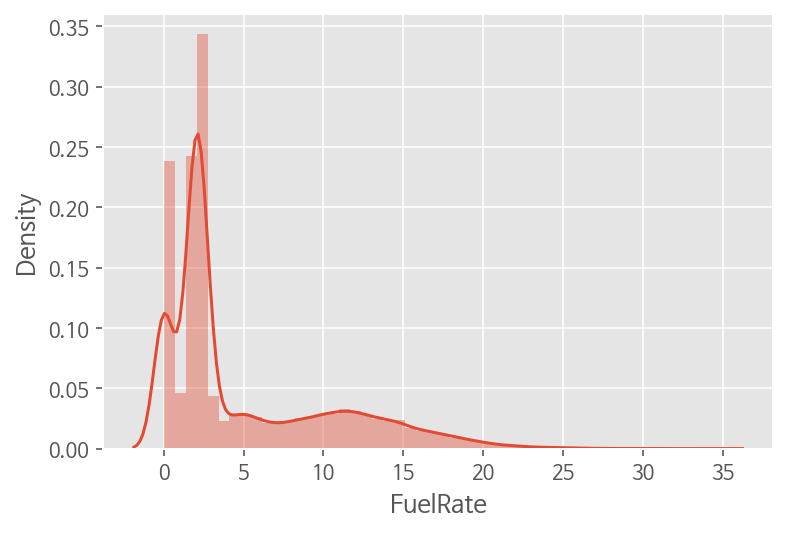

In [ ]:
# FuelRate의 분포 살펴보기
sns.distplot(df['FuelRate']);

### 2.6 Describe

In [ ]:
# describe로 통계요약 확인
df_des = df.describe()
df_des

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
count,50298.000000,50298.000000,50298.0,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.0,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.000000,50298.0,50298.0,50298.0
mean,1.231142,0.973836,0.0,2018.715496,9.994274,3.035548,13.979562,29.197284,29.487256,78.986739,4.0,797.193208,17.146977,14.911911,17.635174,16.103404,12.500199,0.379220,0.000128,22.570699,5.045253,3.873037,3.886934,8.454280,19.759977,8.975182,14.488707,12.561939,-1.825122,28.635415,-0.870645,-1.565028,88.699630,391.887153,0.989801,37.197897,125.616455,50.383972,0.0,0.0,0.0
std,0.772831,0.159625,0.0,50.909880,0.226939,0.195199,5.775214,17.143569,17.328249,13.651287,0.0,278.022222,15.011645,13.053231,15.390863,14.911326,20.919547,0.485198,0.448407,20.755402,5.404085,2.839418,2.825691,2.143805,0.700710,0.880578,0.835178,2.139559,3.862700,1.421575,1.156840,2.617320,7.003571,79.228180,0.100476,3.662838,12.369313,53.931111,0.0,0.0,0.0
min,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.666000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-3.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1.000000,1.000000,0.0,2020.000000,10.000000,3.000000,10.000000,15.000000,14.000000,79.000000,4.0,647.000000,0.000000,0.000000,0.066000,1.000000,0.000000,0.000000,-0.190000,10.000000,1.950000,0.000000,0.000000,7.400000,19.700000,8.600000,14.300000,10.600000,0.000000,27.700000,-1.500000,-1.300000,83.000000,345.000000,1.000000,37.551980,126.805100,19.000000,0.0,0.0,0.0
50%,1.000000,1.000000,0.0,2020.000000,10.000000,3.000000,14.000000,29.000000,29.000000,81.000000,4.0,685.000000,16.452000,14.306000,17.021500,13.000000,0.000000,0.000000,0.000000,12.000000,2.200000,4.000000,4.000000,10.000000,20.000000,9.000000,15.000000,12.400000,0.000000,28.600000,-0.300000,-0.200000,89.000000,345.000000,1.000000,37.559230,126.826900,22.000000,0.0,0.0,0.0
75%,1.000000,1.000000,0.0,2020.000000,10.000000,3.000000,18.000000,44.000000,45.000000,83.000000,4.0,974.000000,28.791000,25.035000,29.480000,27.000000,23.000000,1.000000,0.190000,42.000000,8.450000,7.000000,7.000000,10.000000,20.000000,10.000000,15.000000,15.000000,0.000000,30.000000,0.000000,0.000000,92.000000,470.000000,1.000000,37.562890,126.853600,84.000000,0.0,0.0,0.0
max,4.000000,1.000000,0.0,2020.000000,10.000000,4.000000,23.000000,59.000000,59.000000,90.000000,4.0,2491.000000,61.009000,53.051000,62.582000,65.000000,100.000000,1.000000,3.047000,94.000000,34.350000,7.000000,7.000000,10.000000,20.000000,10.000000,15.000000,15.000000,0.000000,30.000000,0.000000,0.000000,100.000000,470.000000,1.000000,37.579050,126.903500,343.000000,0.0,0.0,0.0


# 3. Outlier

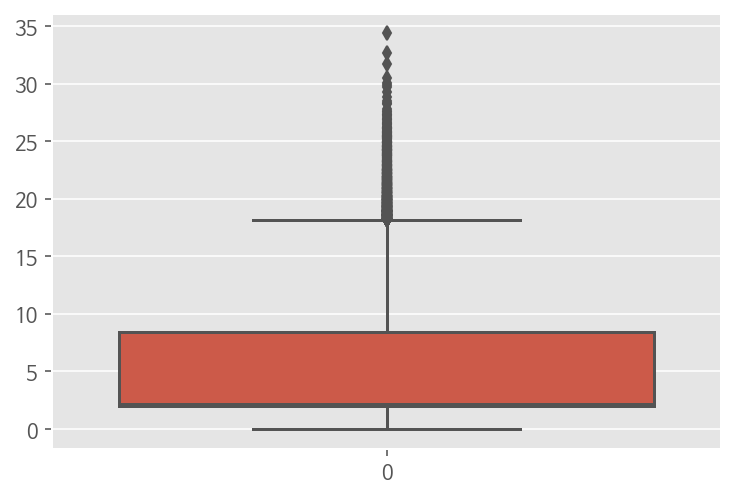

In [ ]:
# 이상치 확인 boxplot
sns.boxplot(data=df['FuelRate'])

* boxplot 으로 확인해보니 target 으로 설정한 FuelRate 의 이상치가 많았다.   
    따라서 이상치의 인덱스를 따로 뽑아서 다른 특성들에 대한 분석을 하겠다.        

### 3.1 IQR Method

*  IQR(Inter Qunatile Range) 방법을 사용하겠다.  
    이방법은 사분위 값의 편차를 이용하고, 위에서 확인한 boxplot으로 볼 수 있다.
    * 25%(1/4 지점) : Q1
    * 50%(2/4 지점) : Q2
    * 75%(3/4 지점) : Q3
    * 100%(4/4 지점) : Q4
* IQR은 여기서 Q1 ~ Q3 지점을 뜻한다. 즉, **IQR = Q3 - Q1** 이다.  
    IQR을 이용해서 이상치(outlier)를 탐지하는 것은 IQR에서 어떤 숫자값을 곱해서 구한다.  
    어떤 숫자는 보통 1.5를 사용한다. 즉, IQR * 1.5 를 곱해서 이를 Q3에 더하고, IQR * 1.5 값을 Q1에서 뺀다.  
    Q3에 더한 값을 **최대값**, Q1에서 뺀 값을 **최소값**이라고 한다.  
    그리고 저 최대값, 최소값보다 크거나, 작은 값들을 **이상치(outlier)**라고 한다.

In [ ]:
# 이상치 탐지 함수
def outlier_iqr(df, column):
    # lower, upper 글로벌 변수 선언하기
    global lower_iqr, upper_iqr
    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # IQR 계산하기
    iqr = q75 - q25
    # outlier cutoff 계산하기
    cut_off = iqr * 1.5
    # lower와 upper bount 값 구하기
    lower_iqr, upper_iqr = q25 - cut_off, q75 + cut_off
    
    print('IQR은', iqr, '이다.')
    print('lower bound 값은', lower_iqr, '이다.')
    print('upper bound 값은', upper_iqr, '이다.')
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    df_out1 = df[df[column] > upper_iqr]
    df_out2 = df[df[column] < lower_iqr]
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', df_out1.shape[0] + df_out2.shape[0], '이다.')

In [ ]:
# IQR 이상치 확인
outlier_iqr(df, 'FuelRate')

IQR은 6.499999999999999 이다.
lower bound 값은 -7.799999999999998 이다.
upper bound 값은 18.199999999999996 이다.
총 이상치 개수는 1292 이다.


In [ ]:
# 해당 이상치 index 확인
df_out_iqr_index = df[df['FuelRate'] > upper_iqr] + df[df['FuelRate'] < lower_iqr]
df_out_iqr_index = df_out_iqr_index.index

In [ ]:
# 이상치 index 추출
df_out_iqr_index

Int64Index([ 2001,  2002,  3160,  3381,  3382,  3389,  3390,  3391,  3398,
             3400,
            ...
            49490, 49491, 49692, 49805, 50017, 50022, 50023, 50024, 50025,
            50289],
           dtype='int64', length=1292)

In [ ]:
# IQR이상치로 DataFrame 만들기
df_out_iqr = []
for i in df_out_iqr_index:
    df_out_iqr_fix = df.loc[i]
    df_out_iqr.append(df_out_iqr_fix)

In [ ]:
# IQR이상치만으로 DataFrame 확인
df_out_iqr = pd.DataFrame(df_out_iqr)
df_out_iqr

,DrvState,LogType,BusType,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
2001,D,S,중형,1,1,0,2020,10,3,6,54,32,82,4,1088,39.759,34.573,41.875,40,42,0,0.190,74,18.20,5,5,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.55898,126.8340,182,0,0,0
2002,D,S,중형,1,1,0,2020,10,3,6,54,33,83,4,1121,41.129,35.765,43.270,41,48,0,0.381,72,18.25,5,5,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.55895,126.8342,182,0,0,0
3160,D,S,중형,1,1,0,2020,10,3,7,13,49,85,4,1104,41.129,35.765,42.293,40,50,0,0.571,75,18.65,5,5,10.0,20.0,10.0,15.0,15.0,0.0,30.0,0.0,0.0,100,470,1,37.55410,126.8578,186,0,0,0
3381,D,S,중형,1,1,0,2020,10,3,7,17,30,83,4,1447,19.194,16.690,19.148,18,41,0,0.571,61,19.60,3,3,10.0,20.0,10.0,15.0,15.0,0.0,30.0,0.0,0.0,100,470,1,37.54934,126.8679,196,0,0,0
3382,D,S,중형,1,1,0,2020,10,3,7,17,31,83,4,1592,21.250,18.478,21.148,20,42,0,0.571,66,23.55,4,3,10.0,20.0,10.0,15.0,15.0,0.0,30.0,0.0,0.0,100,470,1,37.54931,126.8680,235,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50022,D,S,중형,3,1,0,2020,10,4,0,26,13,81,4,1152,26.049,22.651,26.262,23,75,0,0.571,71,19.00,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57566,126.8022,190,0,0,0
50023,D,S,중형,3,1,0,2020,10,4,0,26,14,81,4,1242,28.791,25.035,28.406,25,72,0,0.762,74,20.80,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57571,126.8022,208,0,0,0
50024,D,S,중형,3,1,0,2020,10,4,0,26,15,81,4,1354,30.162,26.228,30.711,29,67,0,0.381,79,23.95,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57581,126.8021,239,0,0,0
50025,D,S,중형,3,1,0,2020,10,4,0,26,16,81,4,1440,32.904,28.612,33.082,31,35,0,0.762,74,24.05,5,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57588,126.8020,240,0,0,0


In [ ]:
# # 좀 더 검토
# # 이상치를 제거한 DataFrame을 새로 만들기
# df_new = []
# for i in df_out_index:
#     df_drop = df.drop(index=[i])
#     df_new.append(df_drop)

In [ ]:
# df_new = pd.DataFrame(df_new)
# df_new

### 3.2 Standard Deviation Method

* 표준 편차는 분산의 척도  
    즉, 개별 데이터 포인트가 평균에서 얼마나 분산되어 있는지의 수치. 
* 통계에서 데이터 분포가 대략 정규이면 데이터 값의 약 68 %가 평균의 1 표준 편차 내에 있고  
    약 95 %가 2 표준 편차 내에 있으며 약 99.7 %가 3 표준 편차 내에 있음

In [ ]:
def out_sdm(df, column):
    global lower_sdm, upper_sdm
    # 평균과 표준편차 계산
    data_mean, data_std = df[column].mean(), df[column].std()
    # outlier cut off 계산
    cut_off = data_std * 2
    # lower 과 upper 계산
    lower_sdm, upper_sdm = data_mean - cut_off, data_mean + cut_off
    print('lower bound 값은', lower_sdm)
    print('upper bound 값은', upper_sdm)
    # 하한값과 상한값 각각 아래 및 위의 레코드 수를 계산
    df1 = df[df[column] > upper_sdm]
    df2 = df[df[column] < lower_sdm]
    return print('총 이상치 개수는', df1.shape[0]+ df2.shape[0], '이다')

In [ ]:
# SDM Method 로 이상치 확인
out_sdm(df, 'FuelRate')

lower bound 값은 -5.762916826825103
upper bound 값은 15.853423407603445
총 이상치 개수는 2798 이다


In [ ]:
# 해당 이상치 index 확인
df_out_std_index = df[df['FuelRate'] > upper_std] + df[df['FuelRate'] < lower_std]
df_out_std_index = df_out_std_index.index

In [ ]:
# 이상치 index 추출
df_out_std_index

Int64Index([  688,  1999,  2000,  2001,  2002,  2003,  2004,  2947,  2948,
             3124,
            ...
            49995, 49996, 50016, 50017, 50021, 50022, 50023, 50024, 50025,
            50289],
           dtype='int64', length=2798)

In [ ]:
# std 이상치로 DataFrame 만들기
df_out_std = []
for i in df_out_std_index:
    df_out_std_fix = df.loc[i]
    df_out_std.append(df_out_std_fix)

In [ ]:
# std이상치만으로 DataFrame 확인
df_out_std = pd.DataFrame(df_out_std)
df_out_std

,DrvState,LogType,BusType,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
688,D,S,중형,3,1,0,2020,10,3,6,32,39,65,4,1229,27.420,23.843,28.492,24,35,0,0.381,59,16.50,4,4,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.57432,126.8027,165,0,0,0
1999,D,S,중형,1,1,0,2020,10,3,6,54,30,82,4,1017,38.388,33.380,39.039,37,46,0,0.381,69,16.20,5,5,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.55903,126.8337,162,0,0,0
2000,D,S,중형,1,1,0,2020,10,3,6,54,31,82,4,1057,39.073,33.977,40.508,38,46,0,0.190,73,17.60,5,5,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.55899,126.8339,176,0,0,0
2001,D,S,중형,1,1,0,2020,10,3,6,54,32,82,4,1088,39.759,34.573,41.875,40,42,0,0.190,74,18.20,5,5,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.55898,126.8340,182,0,0,0
2002,D,S,중형,1,1,0,2020,10,3,6,54,33,83,4,1121,41.129,35.765,43.270,41,48,0,0.381,72,18.25,5,5,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,470,1,37.55895,126.8342,182,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50022,D,S,중형,3,1,0,2020,10,4,0,26,13,81,4,1152,26.049,22.651,26.262,23,75,0,0.571,71,19.00,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57566,126.8022,190,0,0,0
50023,D,S,중형,3,1,0,2020,10,4,0,26,14,81,4,1242,28.791,25.035,28.406,25,72,0,0.762,74,20.80,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57571,126.8022,208,0,0,0
50024,D,S,중형,3,1,0,2020,10,4,0,26,15,81,4,1354,30.162,26.228,30.711,29,67,0,0.381,79,23.95,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57581,126.8021,239,0,0,0
50025,D,S,중형,3,1,0,2020,10,4,0,26,16,81,4,1440,32.904,28.612,33.082,31,35,0,0.762,74,24.05,5,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57588,126.8020,240,0,0,0


* IQR 의 이상치 갯수는 1292개 이고 SDM 는 1104개 임
    이 이유는 IQR에서 바라보는 이상치의 범위와 STD에서 바라보는 이상치의 범위가 다르기 때문임 
    * IQR 에서는 25%미만의 값과 75%초과의 값을 이상치로 보고있음
    * STD 방법에서는 cut-off 는 표준편차에 3배를 해준 값으로 보고있음
    * 따라서 이 두방법의 범위의 차이 때문에 이상치의 갯수가 달라지는것이라 할 수 있음
* 여기에서 이 cut-off 의 범위에 대한 고려도 해줘야 한다고 생각함




### 3.3 Isolation Forest

![Isolation Forest](https://miro.medium.com/max/3000/0*OcgzxWbDqcMWN91E.png)
* Isolation Forest
    * Tree를 이용한 이상탐지를 위한 비지도학습 알고리즘
    * Regression Decision Tree를 기반으로 실행
    * Regression Tree가 재귀 이진 분할을 이용하여 영역을 나누는 개념을 이용함
        * Random Forest와 같이 feature를 random 하게 선택함
        * 선택된 feature의 maximum, minimum 값 사이의 split value를 이용해 tree 구현  

* Isolation Forest 구현 개념
    * 일반적으로 정상 데이터의 경우, 더 많은 재귀 이진분할이 필요함. 반면에 비정상 데이터는 정상데이터에 비해 이진 분할이 덜 필요하게 된다는 개념에 착안하여 Tree로 부터 anomaly를 판단하는 개념 → 예외는 정산에 비해 분리하기가 더 쉬움
    * 재귀 이진분할이기 때문에 tree의 깊이가 짧을 수록 비정상 데이터일 가능성이 높음

* Isolation Forest Score 산정 방법
    * Isolation Tree를 여러개의 앙상블 모델을 만들면 이상지수 score를 계산할 수 있음
        * score는 0 ~ 1사이의 값으로 표현
        * Tree는 50~100개 정도의 모델을 사용하면 score가 안정화 된다는 논문이 있음

In [ ]:
# 새롭게 dataset 불러오기
# 일단 하나의 csv 파일을 가져와 분석(공항버스의 8163버스의 2020-10-03의 하루 데이터)
isolation = pd.read_csv(data, encoding='cp949')

print(isolation.shape)
isolation.head()

(50298, 44)


,DrvState,LogType,BusType,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
0,D,S,중형,1,0,0,1,1,1,0,0,1,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
1,D,S,중형,1,0,0,1,1,1,0,0,2,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
2,D,S,중형,1,0,0,1,1,1,0,0,3,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
3,D,S,중형,1,0,0,1,1,1,0,0,4,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
4,D,S,중형,1,0,0,1,1,1,0,0,5,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0


In [ ]:
# 이상치 판별에서 중요하지 않은 value를 가지는 DrvState, LogType, BusType 를 드랍하기
df_iso = isolation.drop(isolation[['DrvState', 'LogType', 'BusType']], axis=1)
df_iso.head()

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
0,1,0,0,1,1,1,0,0,1,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
1,1,0,0,1,1,1,0,0,2,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
2,1,0,0,1,1,1,0,0,3,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
3,1,0,0,1,1,1,0,0,4,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
4,1,0,0,1,1,1,0,0,5,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0


In [ ]:
# model fitting
model=IsolationForest(n_estimators=100, max_samples='auto', n_jobs=-1,
                      max_features=1, contamination=0.01, random_state=33)
model.fit(df_iso.to_numpy())

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1, max_samples='auto', n_estimators=100, n_jobs=-1,
                random_state=33, verbose=0, warm_start=False)

In [ ]:
# 데이터프레임에 평가 점수(score)와 이상(anomaly) 판단 여부에 대한 값을 추가
score = model.decision_function(df_iso.to_numpy())
anomaly = model.predict(df_iso.to_numpy())
df_iso['scores']= score
df_iso['anomaly']= anomaly
# 이상값은 -1으로 나타냄
df_iso_anomaly = df_iso.loc[df_iso['anomaly']==-1]
df_iso_anomaly

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4,scores,anomaly
0,1,0,0,1,1,1,0,0,1,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,-0.034217,-1
1,1,0,0,1,1,1,0,0,2,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,-0.034202,-1
2,1,0,0,1,1,1,0,0,3,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,-0.034731,-1
3,1,0,0,1,1,1,0,0,4,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,-0.035720,-1
4,1,0,0,1,1,1,0,0,5,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,-0.038617,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50269,1,1,0,2020,10,4,0,30,10,41,4,1802,0.0,0.0,0.0,0,14,0,0.0,21,9.50,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,95,0,0,0,-0.001448,-1
50270,1,1,0,2020,10,4,0,30,11,41,4,1807,0.0,0.0,0.0,0,14,0,0.0,21,9.45,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,94,0,0,0,-0.000889,-1
50271,1,1,0,2020,10,4,0,30,12,41,4,1809,0.0,0.0,0.0,0,14,0,0.0,21,9.50,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,95,0,0,0,-0.000496,-1
50273,1,1,0,2020,10,4,0,30,14,42,4,1806,0.0,0.0,0.0,0,14,0,0.0,20,9.30,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,93,0,0,0,-0.000643,-1


In [ ]:
# 해당 이상치 index 확인
df_iso_anomaly.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            50259, 50265, 50266, 50267, 50268, 50269, 50270, 50271, 50273,
            50289],
           dtype='int64', length=503)

In [ ]:
# isolation forest 이상치로 DataFrame 만들기
df_out_iso = []
for i in df_iso_anomaly.index:
    df_out_iso_fix = df.loc[i]
    df_out_iso.append(df_out_iso_fix)

In [ ]:
# iso이상치만으로 DataFrame 확인
df_out_iso = pd.DataFrame(df_out_iso)
df_out_iso

,DrvState,LogType,BusType,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
0,D,S,중형,1,0,0,1,1,1,0,0,1,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
1,D,S,중형,1,0,0,1,1,1,0,0,2,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
2,D,S,중형,1,0,0,1,1,1,0,0,3,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
3,D,S,중형,1,0,0,1,1,1,0,0,4,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
4,D,S,중형,1,0,0,1,1,1,0,0,5,0,4,0,0.0,0.0,0.0,0,0,0,0.0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50269,U,S,중형,1,1,0,2020,10,4,0,30,10,41,4,1802,0.0,0.0,0.0,0,14,0,0.0,21,9.50,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,95,0,0,0
50270,U,S,중형,1,1,0,2020,10,4,0,30,11,41,4,1807,0.0,0.0,0.0,0,14,0,0.0,21,9.45,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,94,0,0,0
50271,U,S,중형,1,1,0,2020,10,4,0,30,12,41,4,1809,0.0,0.0,0.0,0,14,0,0.0,21,9.50,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,95,0,0,0
50273,U,S,중형,1,1,0,2020,10,4,0,30,14,42,4,1806,0.0,0.0,0.0,0,14,0,0.0,20,9.30,0,2,10.0,20.0,10.0,15.0,15.0,-10.0,30.0,-3.0,-7.0,80,0,0,0.0,0.0,93,0,0,0


In [ ]:
# 3가지의 방법으로 뽑아낸 이상치들중 중복된값 보기
df_out_index = df_out_iqr.index & df_out_std.index & df_out_iso.index
len(df_out_index)

70

In [ ]:
# 중복된 이상치로 data frame 만들기
df_out = []
for i in df_out_index:
    df_out_fix = df.loc[i]
    df_out.append(df_out_fix)

In [ ]:
# 중복된 이상치만으로 DataFrame 확인
df_out = pd.DataFrame(df_out)
df_out

,DrvState,LogType,BusType,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
11281,D,S,중형,1,1,0,2020,10,3,10,9,19,85,4,1460,55.525,48.282,56.746,57,49,0,0.190,74,23.95,5,5,10.0,20.0,8.6,15.0,14.8,0.0,30.0,0.0,0.0,98,470,1,37.54398,126.8909,239,0,0,0
15244,D,S,중형,1,1,0,2020,10,3,12,4,23,80,4,1311,30.162,26.228,30.207,28,56,0,0.571,68,19.95,4,4,10.0,16.7,8.2,14.1,11.9,0.0,27.3,-2.0,0.0,86,470,1,37.56179,126.8052,199,0,0,0
15245,D,S,중형,1,1,0,2020,10,3,12,4,24,80,4,1392,32.218,28.016,32.215,30,40,0,0.571,70,22.20,5,4,10.0,16.7,8.2,14.1,11.9,0.0,27.3,-2.0,0.0,86,470,1,37.56177,126.8053,222,0,0,0
15469,D,S,중형,1,1,0,2020,10,3,12,8,8,78,4,1063,40.444,35.169,40.949,36,72,0,0.571,78,18.80,5,5,10.0,16.7,8.2,14.1,11.9,0.0,27.3,-2.0,0.0,86,470,1,37.55421,126.8132,188,0,0,0
15470,D,S,중형,1,1,0,2020,10,3,12,8,9,79,4,1091,41.129,35.765,42.191,37,54,0,0.190,79,19.55,5,5,10.0,16.7,8.2,14.1,11.9,0.0,27.3,-2.0,0.0,86,470,1,37.55414,126.8133,195,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,D,S,중형,1,1,0,2020,10,4,0,13,10,84,4,1330,29.476,25.631,30.578,27,58,0,0.381,72,21.55,4,4,7.5,20.0,9.0,14.8,10.1,0.0,27.6,-0.5,-0.8,88,345,1,37.55600,126.8114,215,0,0,0
49239,D,S,중형,1,1,0,2020,10,4,0,13,11,84,4,1423,32.218,28.016,32.695,30,64,0,0.762,80,25.55,5,4,7.5,20.0,9.0,14.8,10.1,0.0,27.6,-0.5,-0.8,88,345,1,37.55606,126.8114,255,0,0,0
50024,D,S,중형,3,1,0,2020,10,4,0,26,15,81,4,1354,30.162,26.228,30.711,29,67,0,0.381,79,23.95,4,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57581,126.8021,239,0,0,0
50025,D,S,중형,3,1,0,2020,10,4,0,26,16,81,4,1440,32.904,28.612,33.082,31,35,0,0.762,74,24.05,5,4,7.2,20.0,9.2,15.0,10.3,0.0,26.8,-0.7,-0.8,87,345,1,37.57588,126.8020,240,0,0,0


* 3개의 이상치들이 각가 1000개가 넘는다곤 하지만 이들의 공통점을 찾아보니 70개로 굉장히 데이터들이 적게 나오게 되었는데 그만큼 이상치들의 공통점이 없다고 판단 됨  
* 이유는 불러온데이터가 한대의 버스가 하루동안의 데이터들이라곤 하지만, 그 시간대나 그 시간을 지나가는 도로마다 각각 연료소모량이 다르기 때문이라 생각됨  
* 하지만 도메인 지식이 없는 상태에서 이것을 기준화 하기엔 아직 많이 부족한 상태라고 생각이듬

In [ ]:
# describe로 통계요약 확인
df_out_des = df_out.describe()
df_out_des

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
count,70.000000,70.0,70.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0,70.0
mean,1.242857,1.0,0.0,2020.0,10.0,3.157143,13.457143,19.314286,29.814286,81.357143,4.0,1383.100000,33.481371,29.114229,34.292900,29.785714,52.157143,0.0,0.535871,69.400000,21.470000,4.314286,4.057143,8.764286,18.800000,8.620000,14.227143,11.797143,-0.142857,27.500000,-0.944286,-0.441429,88.285714,397.214286,0.928571,34.870922,117.774654,214.385714,0.0,0.0,0.0
std,0.646859,0.0,0.0,0.0,0.0,0.366563,7.256553,18.279269,16.084282,5.200434,0.0,177.882566,13.616963,11.840824,13.970482,15.392350,17.447757,0.0,0.243268,8.941679,2.916786,0.909576,0.849309,1.450641,1.334492,0.508365,0.835606,1.674962,1.195229,0.991559,0.763978,0.959996,3.624165,78.775206,0.259399,9.741290,32.900678,29.119092,0.0,0.0,0.0
min,1.000000,1.0,0.0,2020.0,10.0,3.000000,0.000000,1.000000,0.000000,45.000000,4.0,1063.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.0,0.000000,52.000000,18.200000,0.000000,2.000000,3.800000,16.700000,7.800000,12.600000,9.800000,-10.000000,25.900000,-3.000000,-7.000000,80.000000,0.000000,0.000000,0.000000,0.000000,182.000000,0.0,0.0,0.0
25%,1.000000,1.0,0.0,2020.0,10.0,3.000000,12.000000,5.250000,17.000000,80.000000,4.0,1290.750000,27.420000,23.843000,27.727750,20.500000,40.000000,0.0,0.381000,64.000000,19.175000,4.000000,4.000000,7.500000,16.700000,8.200000,14.100000,10.500000,0.000000,27.225000,-2.000000,-0.800000,86.000000,345.000000,1.000000,37.545835,126.811400,191.250000,0.0,0.0,0.0
50%,1.000000,1.0,0.0,2020.0,10.0,3.000000,12.000000,11.000000,28.000000,82.000000,4.0,1380.000000,31.533000,27.420000,32.025500,29.000000,49.500000,0.0,0.571000,70.000000,20.700000,5.000000,4.000000,9.000000,19.500000,8.600000,14.500000,11.250000,0.000000,27.300000,-0.700000,0.000000,87.000000,345.000000,1.000000,37.550200,126.820500,206.500000,0.0,0.0,0.0
75%,1.000000,1.0,0.0,2020.0,10.0,3.000000,19.000000,36.500000,46.000000,84.000000,4.0,1472.750000,43.871000,38.149000,45.138750,40.000000,64.750000,0.0,0.762000,76.750000,23.687500,5.000000,5.000000,10.000000,19.800000,9.000000,14.800000,11.900000,0.000000,27.800000,-0.500000,0.000000,89.000000,470.000000,1.000000,37.555552,126.826475,236.750000,0.0,0.0,0.0
max,4.000000,1.0,0.0,2020.0,10.0,4.000000,23.000000,54.000000,59.000000,86.000000,4.0,2256.000000,58.267000,50.667000,59.836000,57.000000,91.000000,0.0,1.142000,94.000000,34.350000,5.000000,5.000000,10.000000,20.000000,10.000000,15.000000,15.000000,0.000000,30.000000,0.000000,0.000000,98.000000,470.000000,1.000000,37.576640,126.900100,343.000000,0.0,0.0,0.0


In [ ]:
# 상관관계수
df_out_corr = df_out.corr()
df_out_corr

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
BusState,1.000000,NaN,NaN,NaN,NaN,0.081204,0.019231,-0.043320,-0.015104,-0.060623,NaN,-0.000088,-0.153758,-0.153759,-0.160955,-0.118422,-0.029113,NaN,0.213503,-0.014533,0.005454,-0.033077,-0.131147,-0.324230,0.283734,0.359630,0.293292,-0.241461,0.045524,0.352491,0.309478,-0.233284,0.075068,-0.181355,0.104880,0.105722,0.104506,0.004188,NaN,NaN,NaN
CanState,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuxStatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,0.081204,NaN,NaN,NaN,NaN,1.000000,-0.806524,-0.141579,-0.039224,-0.181920,NaN,0.406498,-0.197578,-0.197579,-0.203748,-0.109533,-0.090025,NaN,0.094331,0.046869,0.407733,-0.063338,-0.215468,-0.327252,0.391075,0.433971,0.326542,-0.315560,-0.278808,0.075760,0.102837,-0.417786,-0.143378,-0.461420,-0.032661,-0.032424,-0.032867,0.406999,NaN,NaN,NaN
Hours,0.019231,NaN,NaN,NaN,NaN,-0.806524,1.000000,-0.054199,0.009430,0.073572,NaN,-0.399829,0.036193,0.036197,0.041863,-0.056331,0.031933,NaN,0.024893,-0.017824,-0.356427,-0.019887,0.099168,-0.046613,-0.055224,0.049737,-0.623984,-0.089797,0.224865,-0.270507,0.232186,0.255321,-0.094864,-0.033234,-0.105591,-0.105673,-0.105553,-0.355374,NaN,NaN,NaN
Minute,-0.043320,NaN,NaN,NaN,NaN,-0.141579,-0.054199,1.000000,-0.049930,0.171538,NaN,0.170637,0.452473,0.452471,0.456145,0.395011,-0.031603,NaN,-0.365558,-0.163754,-0.024285,0.149131,0.299422,0.044318,0.366039,-0.348324,0.503359,0.600859,-0.070883,0.311365,0.108630,-0.015930,0.597831,0.161602,-0.077722,-0.078151,-0.077005,-0.024872,NaN,NaN,NaN
Sec,-0.015104,NaN,NaN,NaN,NaN,-0.039224,0.009430,-0.049930,1.000000,-0.009072,NaN,0.292986,-0.078787,-0.078792,-0.071360,-0.011051,-0.259193,NaN,0.059483,-0.349752,-0.043354,-0.096997,-0.181691,0.025613,-0.066507,-0.065474,0.041896,0.012461,-0.001400,-0.010178,-0.023442,-0.007357,-0.015734,0.046368,0.107930,0.107876,0.107971,-0.042887,NaN,NaN,NaN
CoolTemp,-0.060623,NaN,NaN,NaN,NaN,-0.181920,0.073572,0.171538,-0.009072,1.000000,NaN,-0.451695,0.388178,0.388177,0.388052,0.333384,-0.229992,NaN,0.114790,0.150224,-0.189561,0.555000,0.343130,-0.063410,-0.019839,-0.376062,0.028753,-0.055785,0.847715,-0.204328,0.252818,0.746456,0.376680,0.583355,0.416692,0.416500,0.416890,-0.189557,NaN,NaN,NaN


In [ ]:
# 공통된 이상치들의 상관계수 중 target인 FuelRate만 뽑아내서 확인
df_out_fuelrate = pd.DataFrame(df_out_corr['FuelRate'])
df_out_fuelrate.sort_values(by='FuelRate', ascending=False)

,FuelRate
FuelRate,1.000000
ItemIndex1,0.999967
Torque,0.590575
RPM,0.493587
Day,0.407733
DecGrade,0.206886
APS,0.190853
CoastingGrade,0.185090
SIGrade,0.131740
Acc2Grade,0.117582


* 상관계수의 절대값이 0.2이하면 보통 상관관계가 무시할 수 있을 정도로 미약하다고 판단하며, 0.2 ~ 0.6 정도면 어느정도 상관관계가 있다고 인정. 그리고 0.6 이상일 경우 매우 강한 상관관계가 있는 것으로 인정
    * 양의 상관관계 : ItemIndex1, Torque, RPM, Day, DecGrade
        * 가장 높은 상관계수를 보여준 Itemlndex1은 특성설명란에도 no meaning 이라고 나와있으므로 의미가 없고, 날짜 데이터도 그 날짜에 해당하는 이상치들의 단순 날짜이므로 의미가 없다고 판단된다.
    * 음의 상관관계 : Hours, ShortAccGrade, SpeedGrade, DrvNo
    * 양의 상관계수와 음의 상관계수를 판단해 봤을때 각각 이 특성들이 어느정도 상관관계가 있는 0.2 ~ 0.6의 값을 지니는 것으로 판단됨

# 4. Visualization

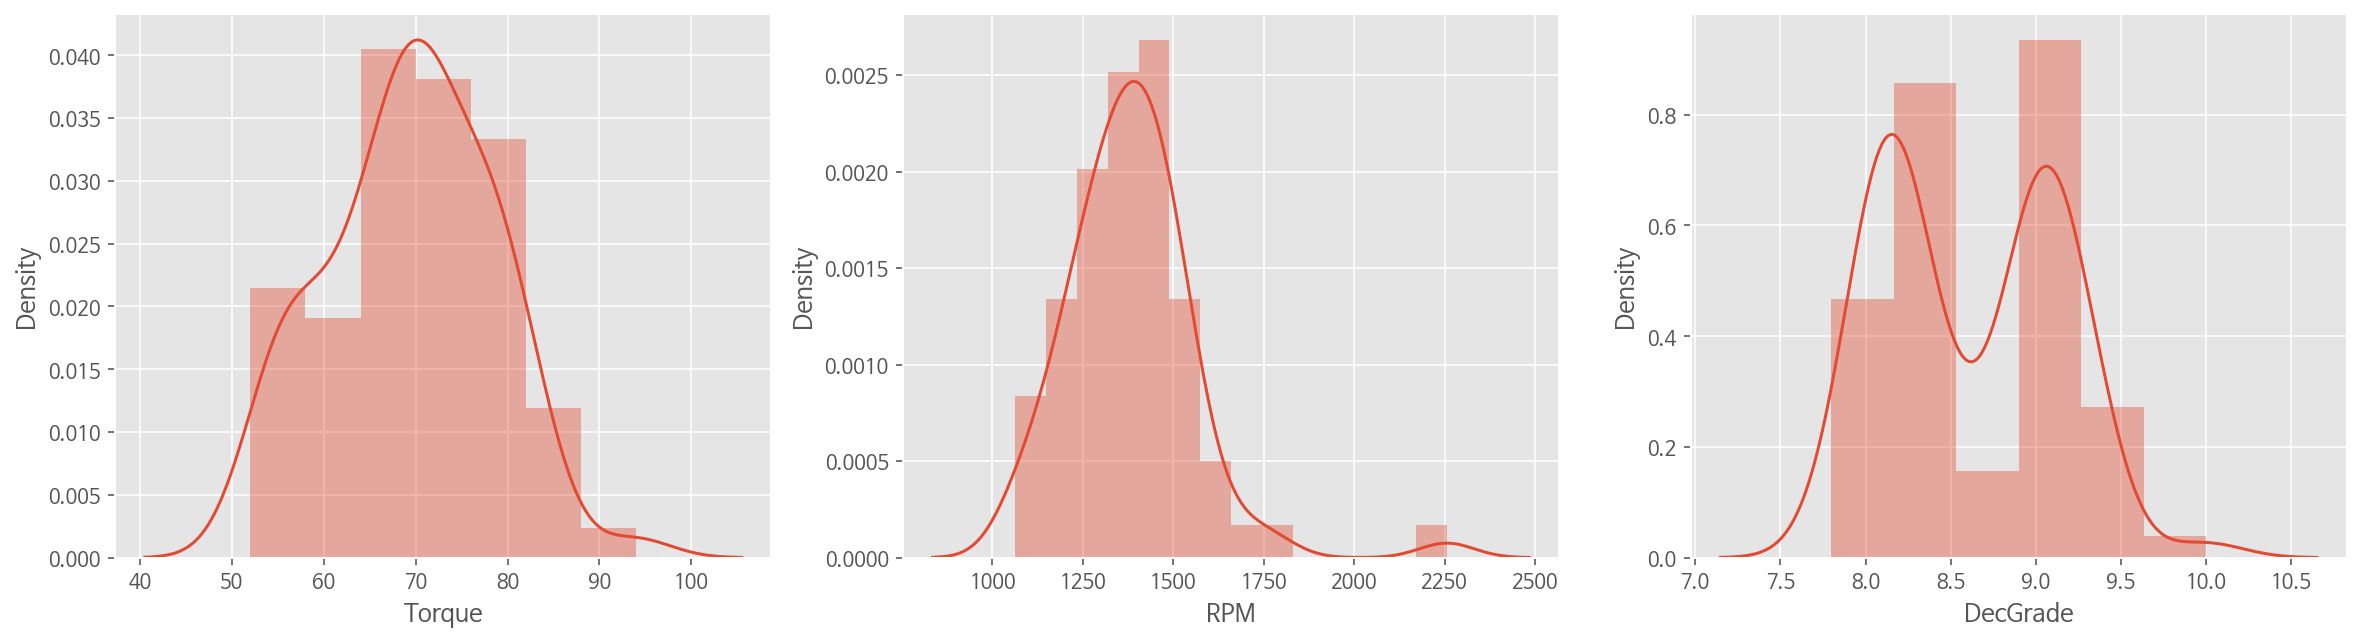

In [ ]:
# 양의 상관관계를 갖는 특성들의 distplot
feature_pos = ['Torque', 'RPM', 'DecGrade']

count = 1
plt.subplots(figsize=(20, 5))
for i in feature_pos:
    plt.subplot(1, 3, count)
    sns.distplot(df_out[i])
    count += 1

In [ ]:
# 전체 데이터 중 에서 'Torque', 'RPM', 'DecGrade'에 해당하는 통계적 요약 보기
df_des[feature_pos]

,Torque,RPM,DecGrade
count,50298.000000,50298.000000,50298.000000
mean,22.570699,797.193208,8.975182
std,20.755402,278.022222,0.880578
min,0.000000,0.000000,0.000000
25%,10.000000,647.000000,8.600000
50%,12.000000,685.000000,9.000000
75%,42.000000,974.000000,10.000000
max,94.000000,2491.000000,10.000000


In [ ]:
# 이상치 데이터 중에서 'Torque', 'RPM', 'DecGrade'에 해당하는 통계적 요약 보기
df_out_des[feature_pos]

,Torque,RPM,DecGrade
count,70.000000,70.000000,70.000000
mean,69.400000,1383.100000,8.620000
std,8.941679,177.882566,0.508365
min,52.000000,1063.000000,7.800000
25%,64.000000,1290.750000,8.200000
50%,70.000000,1380.000000,8.600000
75%,76.750000,1472.750000,9.000000
max,94.000000,2256.000000,10.000000


* 단순히 평균만 놓고 보기에도 절대값으로 Touque는 46, RPM은 586, DecGrade은 0.355 차이가 생기는 것을 알수 있음

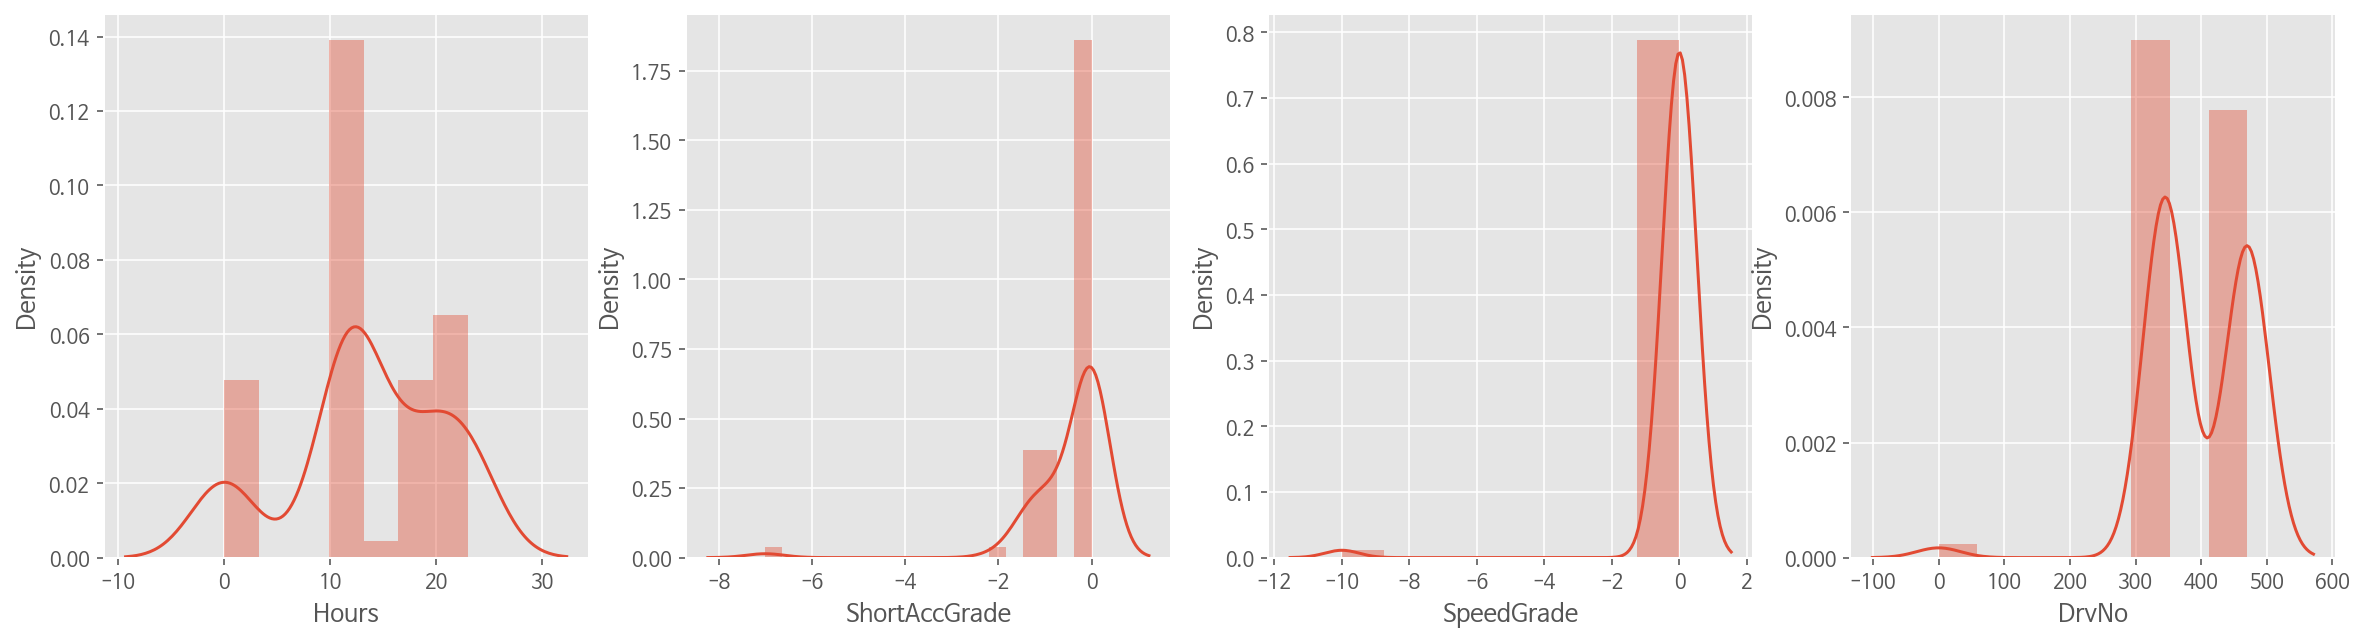

In [ ]:
# 음의 상관관계를 갖는 특성들의 distplot
feature_neg = ['Hours', 'ShortAccGrade', 'SpeedGrade', 'DrvNo']

count = 1
plt.subplots(figsize=(20, 5))
for i in feature_neg:
    plt.subplot(1, 4, count)
    sns.distplot(df_out[i])
    count += 1

In [ ]:
# 전체 데이터 중 에서 'Hours', 'ShortAccGrade', 'SpeedGrade', 'DrvNo'에 해당하는 통계적 요약 보기
df_des[feature_neg]

,Hours,ShortAccGrade,SpeedGrade,DrvNo
count,50298.000000,50298.000000,50298.000000,50298.000000
mean,13.979562,-1.565028,-1.825122,391.887153
std,5.775214,2.617320,3.862700,79.228180
min,0.000000,-7.000000,-10.000000,0.000000
25%,10.000000,-1.300000,0.000000,345.000000
50%,14.000000,-0.200000,0.000000,345.000000
75%,18.000000,0.000000,0.000000,470.000000
max,23.000000,0.000000,0.000000,470.000000


In [ ]:
# 이상치 데이터 중에서 'Hours', 'ShortAccGrade', 'SpeedGrade', 'DrvNo'에 해당하는 통계적 요약 보기
df_out_des[feature_neg]

,Hours,ShortAccGrade,SpeedGrade,DrvNo
count,70.000000,70.000000,70.000000,70.000000
mean,13.457143,-0.441429,-0.142857,397.214286
std,7.256553,0.959996,1.195229,78.775206
min,0.000000,-7.000000,-10.000000,0.000000
25%,12.000000,-0.800000,0.000000,345.000000
50%,12.000000,0.000000,0.000000,345.000000
75%,19.000000,0.000000,0.000000,470.000000
max,23.000000,0.000000,0.000000,470.000000


* 평균으로 비교를 해보았을때 Hour와 DrvNo는 각 측정시간, 운전자의 고유ID 이므로 평균이 의미가 없고, ShortAccGrade은 1.1236, SpeedGrade은 1.6822 만큼 차이가 남
* 하지만 Grade은 각 등급을 매겨놓은 수치이므로 각각 1~2사이 만큼의 등급차이가 난다고 판단할수 있음

# 5. 고찰

* 5만개의 샘플을 이용하여 3가지의 이상치 확인 Method를 사용하였다.
하지만 중복된 샘플은 고작 70 뿐이다.  
이는, 각 Method 마다 이상치를 판단하는 기준이 매우 다르기 때문이라 판단한다.  
따라서, 5만개의 샘플 중 이상치는 70개 뿐이기 때문에 이 샘플들은 드랍을 해도 된다 생각한다.  
물론 이상치를 판단하는 Method는 더 여러가지가 있기 때문에 나의 판단이 옳다라곤 할수 없다.  

* 이를 보면 알 수 있듯이 도메인에 대한 지식이 충분치 않은 상태에서 단순 수치적으로 이상치를 판단한다는 것 자체가 어려운 일이고 각 특성간의 유기적 연관관계를 알아야 좀 더 확실한 이상치에 대한 기준을 마련할수 있을 것이다.
